In [ ]:
import os
import pickle
import string
import pandas as pd
import seaborn as sns
from sklearn import svm
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Reading Data


In [ ]:
def load_data(folder):
    data = []
    for filename in os.listdir(folder):
        with open(os.path.join(folder, filename), 'r', encoding='utf-8') as file:
            text = file.read()
            data.append(text)
    return data

In [ ]:
pos_data = load_data('/content/drive/MyDrive/pos')
neg_data = load_data('/content/drive/MyDrive/neg')

In [ ]:
pos_df = pd.DataFrame({'text': pos_data, 'sentiment': 1})
neg_df = pd.DataFrame({'text': neg_data, 'sentiment': 0})
data = pd.concat([pos_df, neg_df], ignore_index=True)
data

,text,sentiment
0,films adapted from comic books have had plenty...,1
1,every now and then a movie comes along from a ...,1
2,you've got mail works alot better than it dese...,1
3,""" jaws "" is a rare film that grabs your atten...",1
4,moviemaking is a lot like being the general ma...,1
...,...,...
1995,a hotshot lawyer gets an obviously guilty chil...,0
1996,the spy game is up . \nyou can thank charlie's...,0
1997,i have always been a fan of director neil jord...,0
1998,"as you should know , this summer has been less...",0


# Shuffle rows

In [ ]:
shuffled_data = data.sample(frac=1,random_state=300).reset_index(drop=True)
shuffled_data

,text,sentiment
0,""" the endurance : shackleton's legendary anta...",1
1,imagine this . \nyou're given a sword and a sh...,1
2,"in some respects , rush hour is the ultimate e...",1
3,""" you leave little notes on my pillow . \ni t...",1
4,is evil dead ii a bad movie ? \nit's full of t...,1
...,...,...
1995,i'm a dedicated fan of writer kevin williamson...,0
1996,call it a road trip for the walking wounded . ...,0
1997,plot : a dude and his brother are driving cros...,1
1998,"apocalypse now , based on the novel "" hearts o...",1


# Preprocessing

In [ ]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = ''.join([i for i in text if not i.isdigit()])
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

In [ ]:
X = shuffled_data['text'].apply(preprocess_text)
y = shuffled_data['sentiment']
#y.to_csv("shuff.csv",index=False)
y

0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    1
1998    1
1999    0
Name: sentiment, Length: 2000, dtype: int64

# Plotting

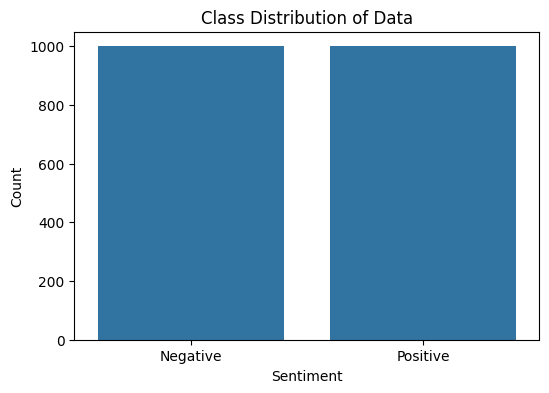

In [ ]:
# Count of Positive and Negative Classes
class_counts = y.value_counts()

# Plotting
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution of Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()

# Splitting Train and Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Label encoding

In [ ]:
# Label encoding
label_encoder = LabelEncoder()
train_y = label_encoder.fit_transform(y_train)
test_y = label_encoder.fit_transform(y_test)

# TFiDf

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# **Models**

## Multinomial Naive Bayes

In [ ]:
# Model training Naive Bayes
model = MultinomialNB()
model.fit(tfidf_train, y_train)

MultinomialNB()

In [ ]:
y_pred = model.predict(tfidf_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("F1 Score:", f1)
print("Naive Bayes Accuracy:", accuracy)

F1 Score: 0.8161209068010076
Naive Bayes Accuracy: 0.8175


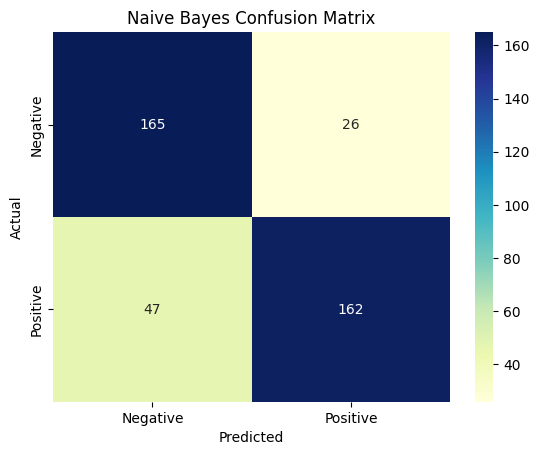

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

## SVM



*   Linear
*   RBF



In [ ]:
C=3
linear_svc = svm.SVC(kernel='linear', C=C).fit(tfidf_train, y_train)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.8, C=C).fit(tfidf_train, train_y)


In [ ]:
y_pred = rbf_svc.predict(tfidf_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("F1 Score:", f1)
print(" RBF Accuracy:", accuracy)

F1 Score: 0.8646080760095013
 RBF Accuracy: 0.8575


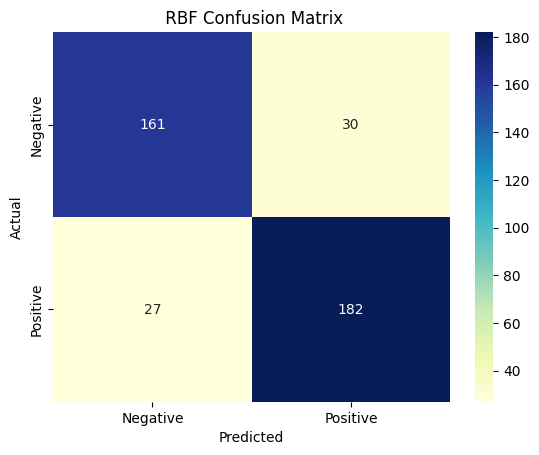

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(' RBF Confusion Matrix')
plt.show()

In [ ]:
y_pred = linear_svc.predict(tfidf_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("F1 Score:", f1)
print("linear svm Accuracy:", accuracy)

F1 Score: 0.850356294536817
linear svm Accuracy: 0.8425


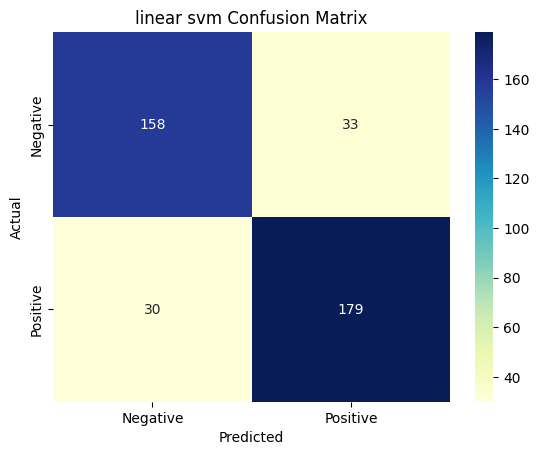

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('linear svm Confusion Matrix')
plt.show()

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

rf_classifier = RandomForestClassifier(n_estimators=250, random_state=44)
rf_classifier.fit(tfidf_train, y_train)
y_pred = rf_classifier.predict(tfidf_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)
print("Random Forest Accuracy:", accuracy)


F1 Score: 0.8081841432225064
Random Forest Accuracy: 0.8125


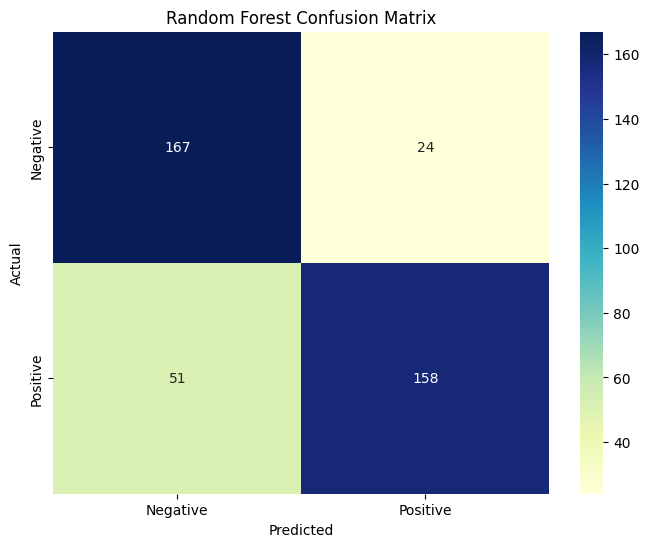

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

logistic_classifier = LogisticRegression(random_state=50)
logistic_classifier.fit(tfidf_train, y_train)
y_pred = logistic_classifier.predict(tfidf_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='binary')
print("F1 Score:", f1)
print("Logistic Regression Accuracy:", accuracy)


F1 Score: 0.861904761904762
Logistic Regression Accuracy: 0.855


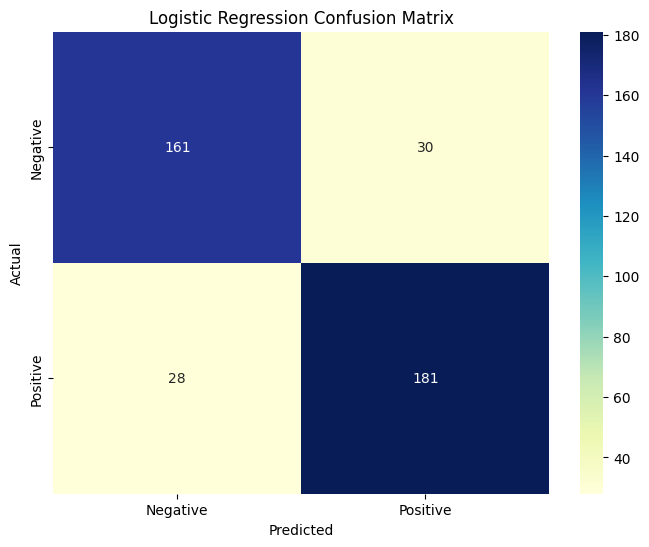

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()


# **Visualization**

## Word cloud

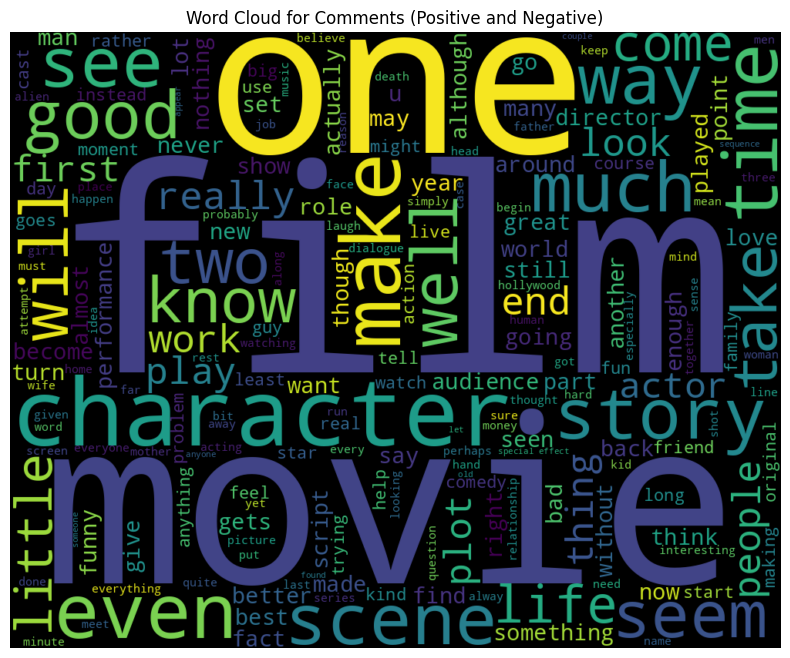

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

positive_comments = ' '.join(shuffled_data[shuffled_data['sentiment'] == 1]['text'])
negative_comments = ' '.join(shuffled_data[shuffled_data['sentiment'] == 0]['text'])
all_comments = positive_comments + ' ' + negative_comments
wordcloud = WordCloud(width=1000, height=800, background_color='black').generate(all_comments)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Comments (Positive and Negative)')
plt.axis('off')
plt.show()

# **Saving Models**

In [ ]:
# Save the trained model
pickle.dump(model, open('naive_bayes_model.pkl', 'wb'))
pickle.dump(linear_svc, open('linear_svm_model.pkl', 'wb'))
pickle.dump(rbf_svc, open('rbf_svm_model.pkl', 'wb'))
pickle.dump(rf_classifier, open('random_forest_model.pkl', 'wb'))
pickle.dump(logistic_classifier, open('logistic_regression_model.pkl', 'wb'))

# Load the saved models
loaded_nb_model = pickle.load(open('naive_bayes_model.pkl', 'rb'))
loaded_linear_svm_model = pickle.load(open('linear_svm_model.pkl', 'rb'))
loaded_rbf_svm_model = pickle.load(open('rbf_svm_model.pkl', 'rb'))
loaded_rf_model = pickle.load(open('random_forest_model.pkl', 'rb'))
loaded_lr_model = pickle.load(open('logistic_regression_model.pkl', 'rb'))